<a href="https://colab.research.google.com/github/RodrigoDSVDF/Projeto1/blob/main/segurosaude02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
saude = pd.read_csv("/content/insurance.csv")

In [12]:
print(saude)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [9]:
#tamanho
saude.shape

(1338, 7)

In [10]:
saude.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# Taduzindo o nome das colunas

saude.columns = ['idade','Genero','IMC','Crianças', 'Fumante',
       'Regiao', 'Encargos']

In [12]:
saude.head()

,idade,Genero,IMC,Crianças,Fumante,Regiao,Encargos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
#explorar dados categoricos
#estado
agrupado = saude.groupby(['Crianças']).size()
agrupado

Crianças
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64

<Axes: xlabel='Genero'>

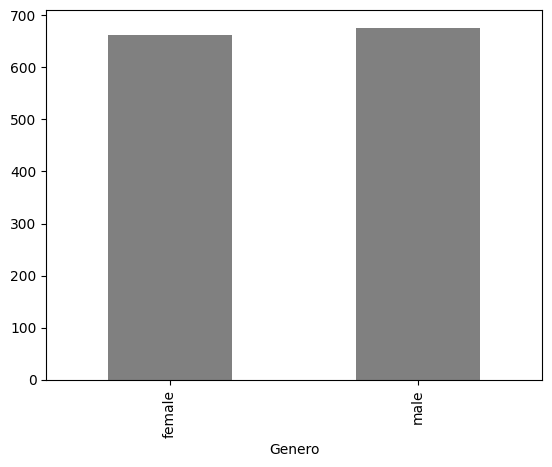

In [14]:
agrupado.plot.bar(color = 'gray')

In [13]:
#genero
agrupado = saude.groupby(['Genero']).size()
agrupado

Genero
female    662
male      676
dtype: int64

<Axes: xlabel='Genero'>

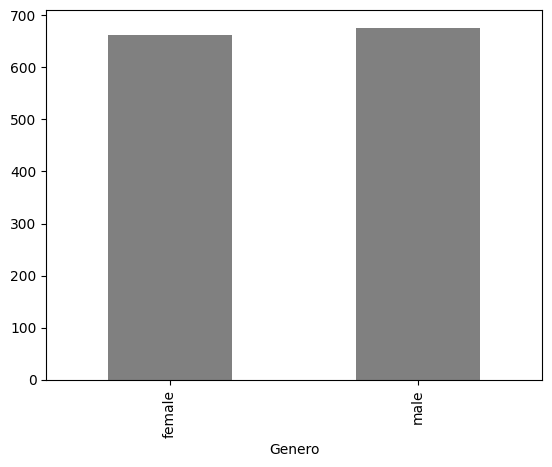

In [41]:
agrupado.plot.bar(color = 'gray')

In [21]:
#Regiao
agrupado = saude.groupby(['Regiao']).size()
agrupado

Regiao
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

<Axes: xlabel='Regiao'>

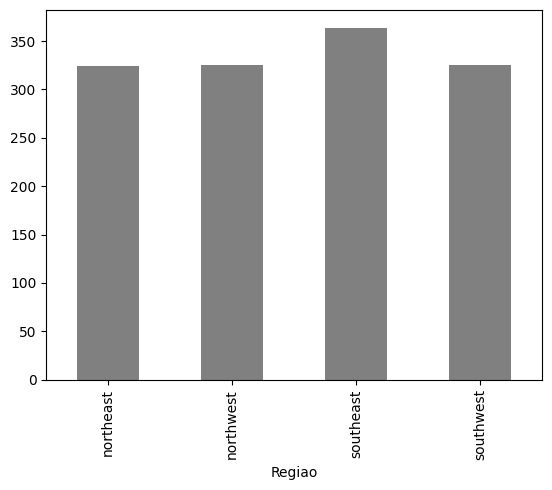

In [22]:
agrupado.plot.bar(color = 'gray')

In [15]:
#explorar colunas numéricas
#score
saude['IMC'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: IMC, dtype: float64

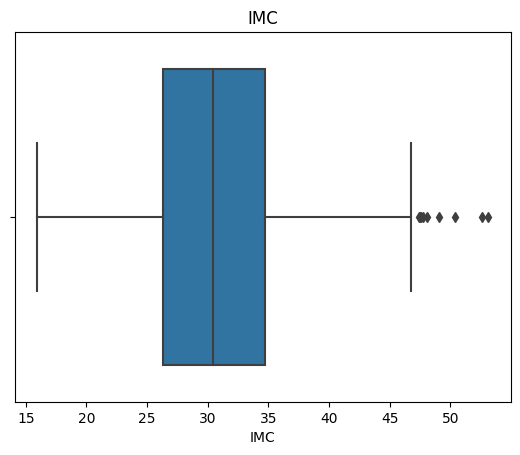

In [19]:
#Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=saude['IMC'], orient='h').set_title('IMC')
plt.xlabel('IMC')
plt.show()


In [48]:
#idade
saude['idade'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: idade, dtype: float64

<ipython-input-53-74ed196f9989>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saude['idade']).set_title('idade')


Text(0.5, 1.0, 'idade')

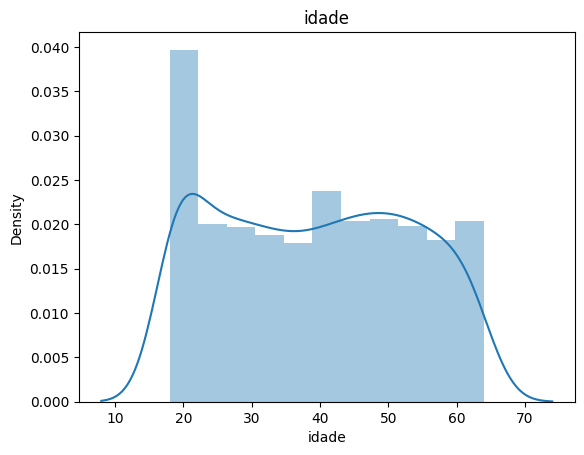

In [53]:
#Analisando a Idade
import seaborn as sns
sns.distplot(saude['idade']).set_title('idade')

In [20]:
#contamos valores NA
saude.isnull().sum()

idade       0
Genero      0
IMC         0
Crianças    0
Fumante     0
Regiao      0
Encargos    0
dtype: int64

In [25]:
# Valor da coluna de Encargos
#idade
saude['Encargos'].describe()


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: Encargos, dtype: float64

<ipython-input-26-bf6084b0bc1a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saude['Encargos']).set_title('Encargos')


Text(0.5, 1.0, 'Encargos')

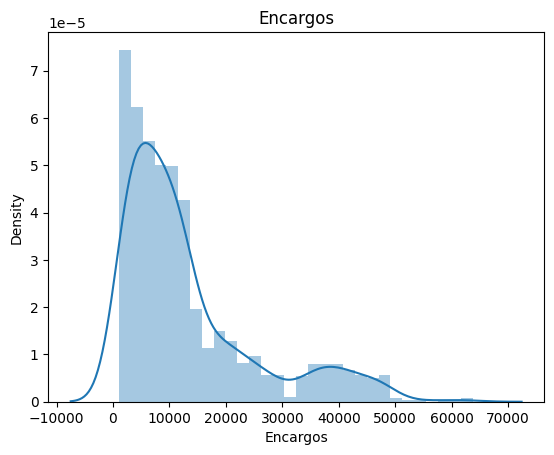

In [26]:
#Analisando a Encargos

sns.distplot(saude['Encargos']).set_title('Encargos')

In [34]:
#resolvendo o problema de oltilier em IMC
saude.loc[(saude['IMC']<0 ) | (saude['IMC']>45)]






,idade,Genero,IMC,Crianças,Fumante,Regiao,Encargos
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
292,25,male,45.54,2,yes,southeast,42112.23560
401,47,male,47.52,1,no,southeast,8083.91980
438,52,female,46.75,5,no,southeast,12592.53450
454,32,male,46.53,2,no,southeast,4686.38870
543,54,female,47.41,0,yes,southeast,63770.42801
547,54,female,46.70,2,no,southwest,11538.42100
549,43,female,46.20,0,yes,southeast,45863.20500
582,39,male,45.43,2,no,southeast,6356.27070


In [38]:
media_imc = saude['IMC'].mean()
print("A média do IMC é:", media_imc)


A média do IMC é: 30.66339686098655


In [39]:
saude['Crianças'].unique()

array([0, 1, 3, 2, 5, 4])

In [41]:
media_imc = saude['Crianças'].mean()
print("A média do Crianças é:", media_imc)

A média do Crianças é: 1.0949177877429


<Axes: ylabel='Frequency'>

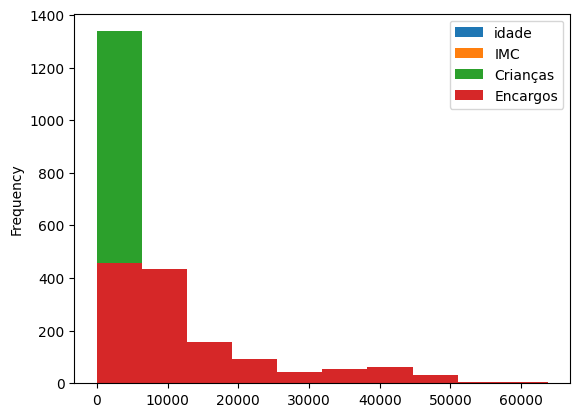

In [40]:
# Verificando um quadro geral dos dados na planilha
saude.plot(kind='hist')

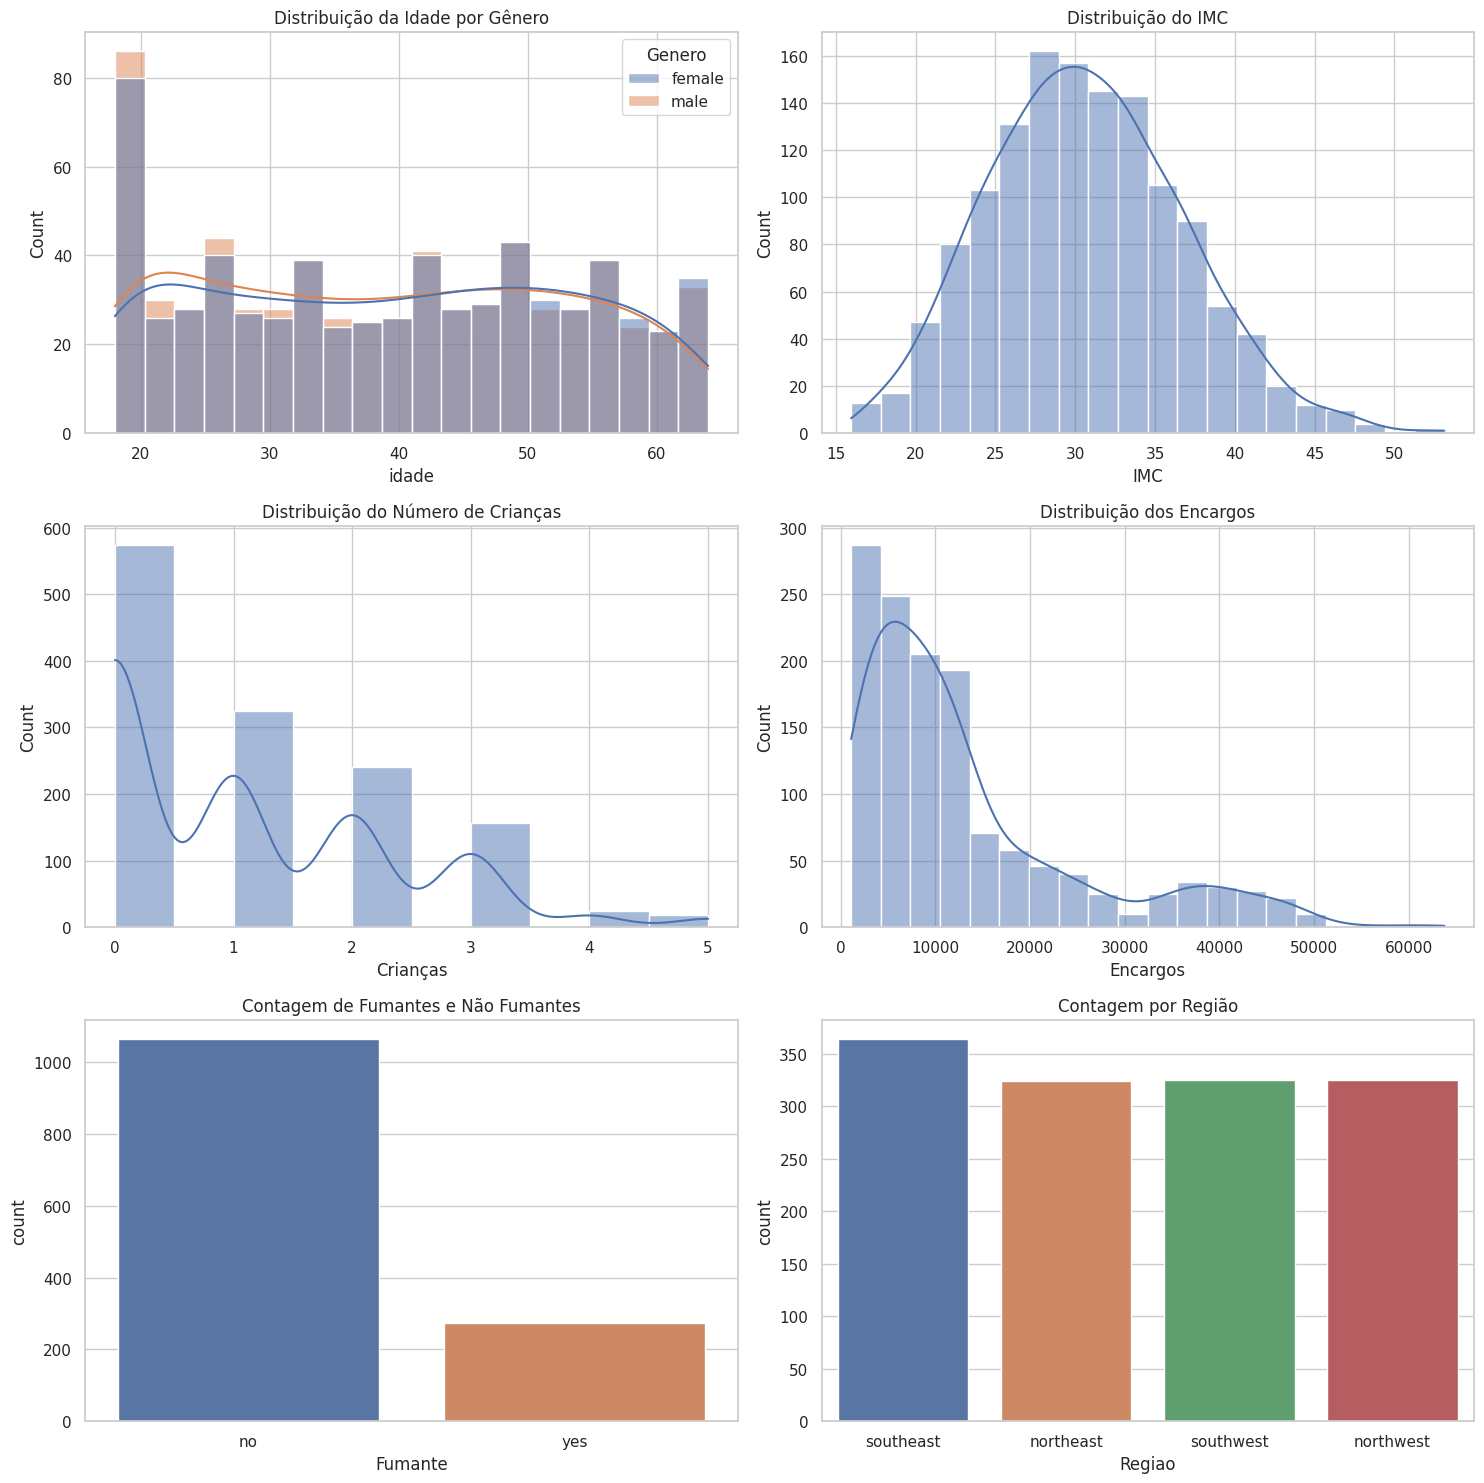

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defina o estilo do seaborn para uma apresentação mais bonita
sns.set(style="whitegrid")

# Crie uma figura com subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Histograma para Idade separado por Gênero
sns.histplot(data=saude_ordenado_por_idade, x='idade', hue='Genero', bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribuição da Idade por Gênero')

# Histograma para IMC
sns.histplot(data=saude_ordenado_por_idade, x='IMC', bins=20, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribuição do IMC')

# Histograma para Número de Crianças
sns.histplot(data=saude_ordenado_por_idade, x='Crianças', bins=10, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribuição do Número de Crianças')

# Histograma para Encargos
sns.histplot(data=saude_ordenado_por_idade, x='Encargos', bins=20, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribuição dos Encargos')

# Contagem de Fumantes e Não Fumantes
sns.countplot(data=saude_ordenado_por_idade, x='Fumante', ax=axs[2, 0])
axs[2, 0].set_title('Contagem de Fumantes e Não Fumantes')

# Contagem por Região
sns.countplot(data=saude_ordenado_por_idade, x='Regiao', ax=axs[2, 1])
axs[2, 1].set_title('Contagem por Região')

# Ajustes de layout
plt.tight_layout()
plt.show()



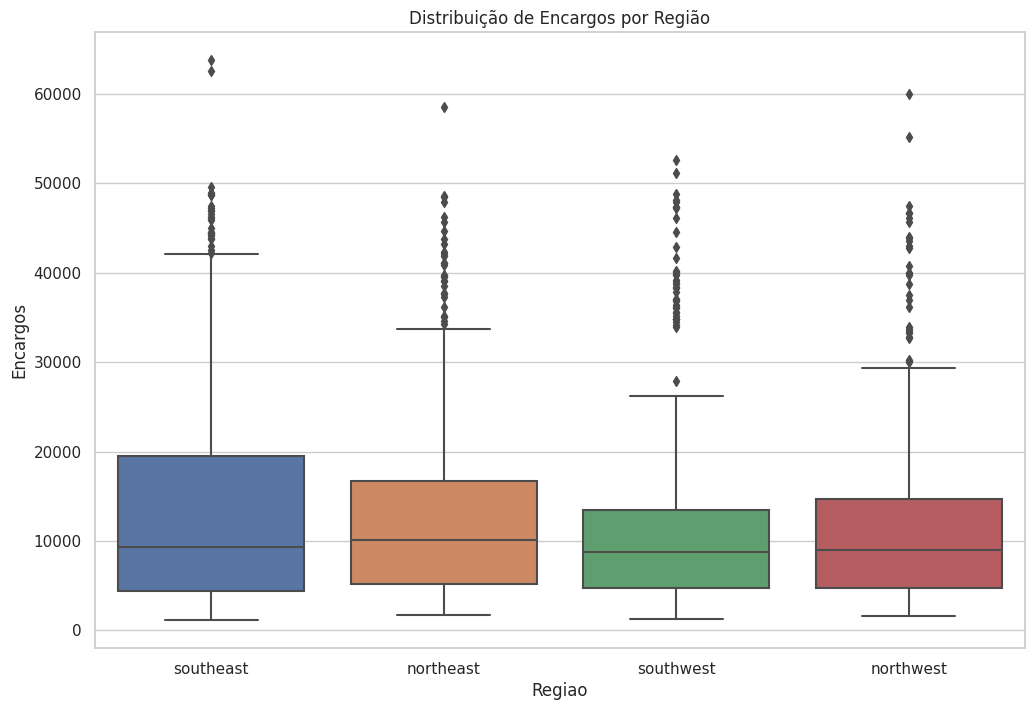

In [64]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Regiao', y='Encargos', data=saude_ordenado_por_idade)
plt.title('Distribuição de Encargos por Região')
plt.show()


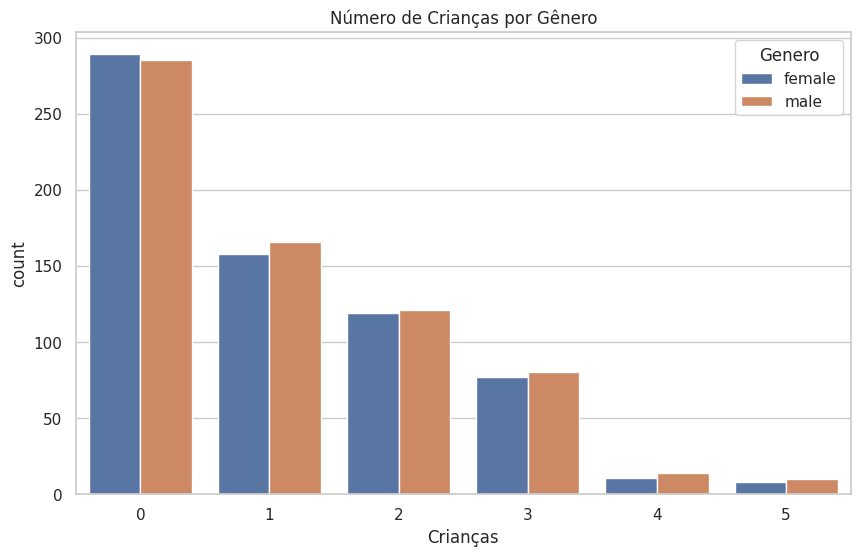

In [65]:
# número de crianças por Gênero

plt.figure(figsize=(10, 6))
sns.countplot(x='Crianças', hue='Genero', data=saude_ordenado_por_idade)
plt.title('Número de Crianças por Gênero')
plt.show()


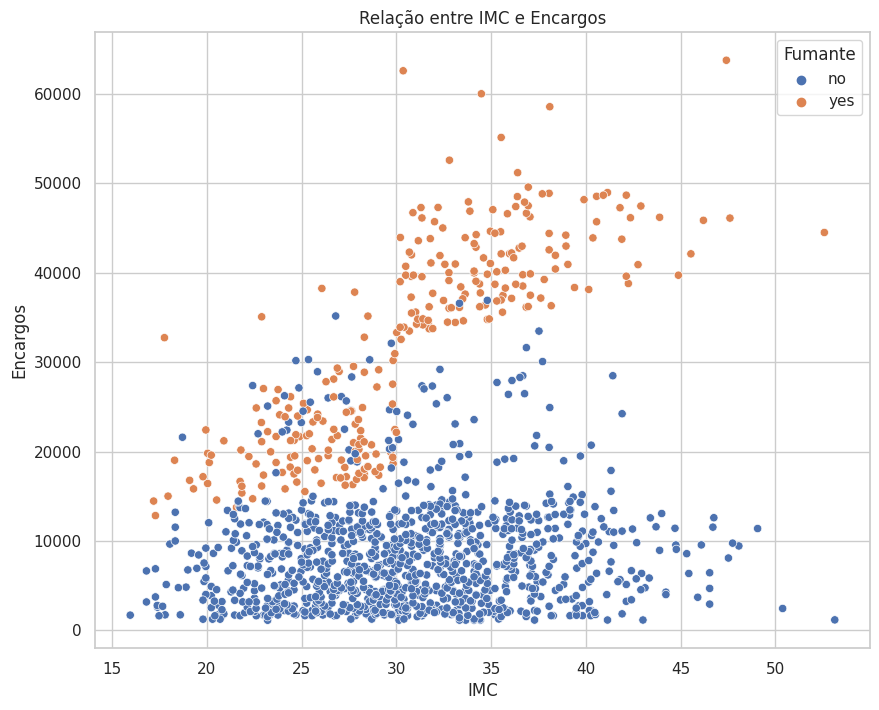

In [78]:
# Gráfico de Dispersão para IMC vs. Encargos:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='IMC', y='Encargos', hue='Fumante', data=saude_ordenado_por_idade)
plt.title('Relação entre IMC e Encargos')
plt.show()


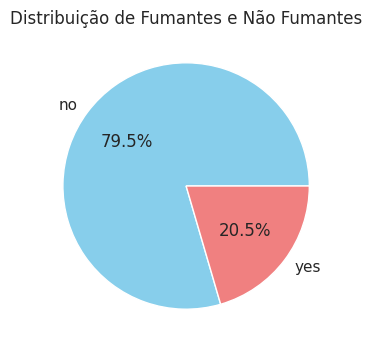

In [77]:
#Grafico de pizza

plt.figure(figsize=(4, 4))
saude_ordenado_por_idade['Fumante'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribuição de Fumantes e Não Fumantes')
plt.ylabel('')
plt.show()


<ipython-input-75-56e812562940>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = saude_ordenado_por_idade.corr()


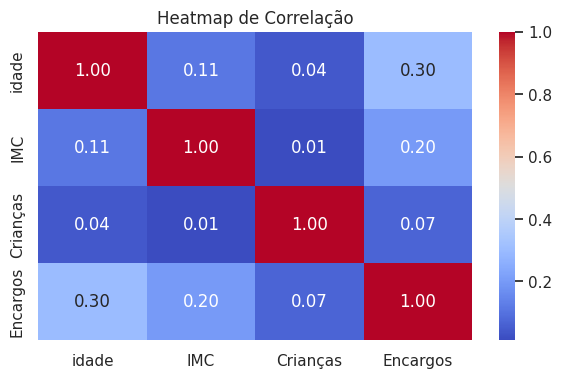

In [75]:
# Heatmap de Correlação:

plt.figure(figsize=(7, 4))
matriz_correlacao = saude_ordenado_por_idade.corr()
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação')
plt.show()


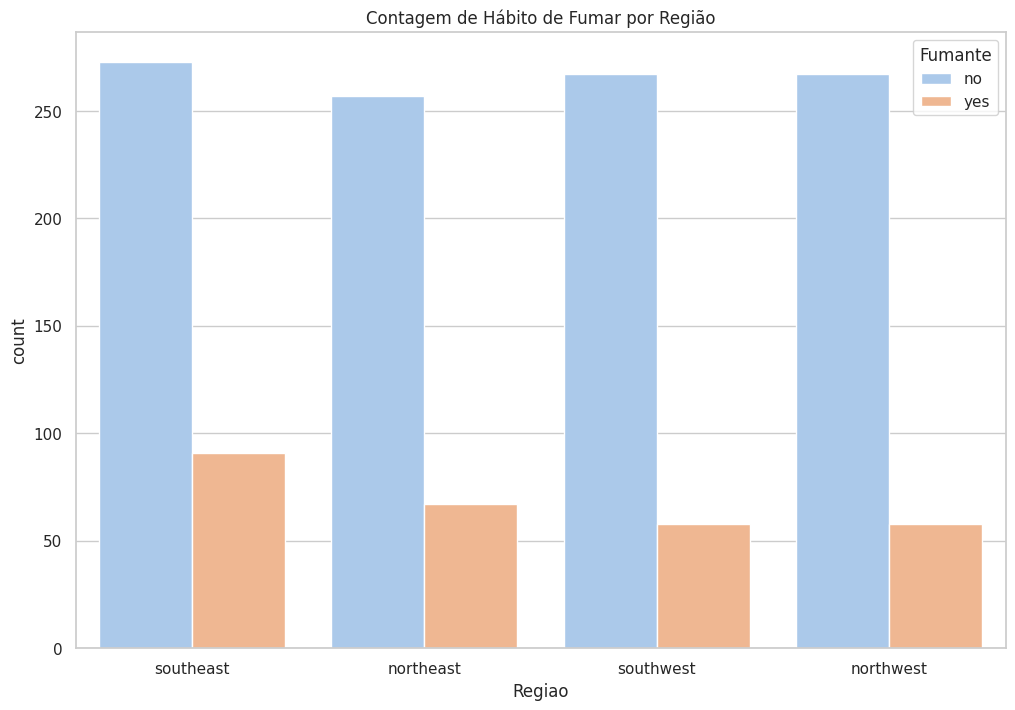

In [74]:
# Contagem de Categorias para Hábito de Fumar por Região:
plt.figure(figsize=(12, 8))
sns.countplot(x='Regiao', hue='Fumante', data=saude_ordenado_por_idade, palette='pastel')
plt.title('Contagem de Hábito de Fumar por Região')
plt.show()


In [79]:
saude.head(20)

,idade,Genero,IMC,Crianças,Fumante,Regiao,Encargos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [80]:
import matplotlib.pyplot as plt


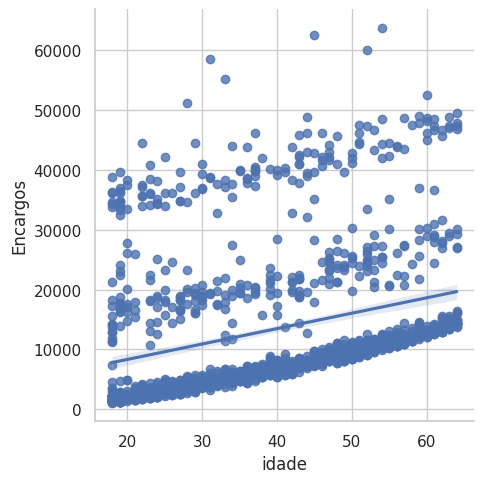

In [88]:
# Neste caso podemos dizer que a CORRELAÇÃO É NEUTRA OU NULA ou que Não existe CORRELAÇÃO entre essas variáveis.
sns.lmplot(x = "idade", y = "Encargos", data = saude);

In [89]:
# Aqui podemos observar os coeficientes da correção
saude.corr()

<ipython-input-89-6cba25e228a8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  saude.corr()


,idade,IMC,Crianças,Encargos
idade,1.000000,0.109272,0.042469,0.299008
IMC,0.109272,1.000000,0.012759,0.198341
Crianças,0.042469,0.012759,1.000000,0.067998
Encargos,0.299008,0.198341,0.067998,1.000000


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['idade'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['IMC'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['Crianças'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Encargos'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_4, *['idade', 'IMC'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_5, *['IMC', 'Crianças'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_6, *['Crianças', 'Encargos'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['idade'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_8, *['IMC'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['Crianças'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['Encargos'], **{})
chart

<ipython-input-91-0b5324ddac05>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(saude.corr(), annot=True)


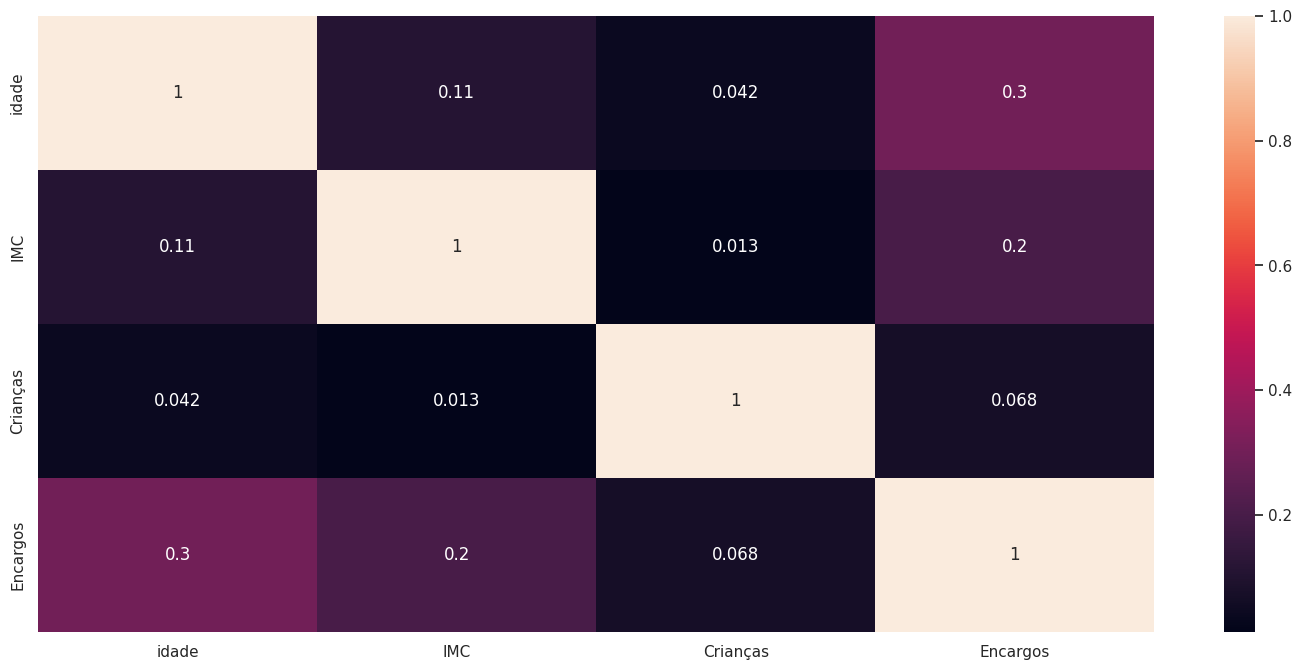

In [91]:
# Através do hitmap podemos observar a correlação entre todas variáveis.
plt.rcParams["figure.figsize"] = (18,8)
ax = sns.heatmap(saude.corr(), annot=True)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Supondo que 'df' seja o seu DataFrame com os dados
X = saude[['idade', 'IMC', 'Fumante', 'Genero']]
y = saude['Encargos']

# Convertendo variáveis categóricas em dummy
X = pd.get_dummies(X, columns=['Genero', 'Fumante'], drop_first=True)

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treinamento do modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o desempenho
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')


RMSE: 5874.993929086607
R²: 0.7776757765738431


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Análise exploratória e limpeza dos dados (se já realizadas)

# Selecionar features e variável alvo
X = saude[['idade', 'IMC', 'Fumante', 'Genero']]
y = saude['Encargos']

# Convertendo variáveis categóricas em dummy
X = pd.get_dummies(X, columns=['Genero', 'Fumante'], drop_first=True)

# Certifique-se de que 'Idade' e 'IMC' são numéricas
X['idade'] = pd.to_numeric(X['idade'], errors='coerce')
X['IMC'] = pd.to_numeric(X['IMC'], errors='coerce')

# Lidando com possíveis valores ausentes (substituindo pela média, por exemplo)
X.fillna(X.mean(), inplace=True)

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treinamento do modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o desempenho
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Exemplo de previsão para um novo cliente
novo_cliente = pd.DataFrame({'idade': [30], 'IMC': [25], 'Genero_male': [0], 'Fumante_yes': [1]})
custo_previsto = model.predict(novo_cliente)


RMSE: 5874.993929086607
R²: 0.7776757765738431


In [57]:
# Criando uma nova feature de interação
X['idade_Fumante'] = X['idade'] * X['Fumante_yes']



In [58]:
from sklearn.preprocessing import StandardScaler

# Inicializando o scaler
scaler = StandardScaler()

# Padronizando as features
X[['idade', 'IMC']] = scaler.fit_transform(X[['idade', 'IMC']])


In [59]:
from sklearn.linear_model import Ridge

# Inicializando e treinando o modelo de Ridge
ridge_model = Ridge(alpha=1.0)  # Você pode ajustar o hiperparâmetro alpha conforme necessário
ridge_model.fit(X_train, y_train)

# Fazendo previsões e avaliando
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge RMSE: {rmse_ridge}')
print(f'Ridge R²: {r2_ridge}')


Ridge RMSE: 5878.204051108719
Ridge R²: 0.7774327523680803


In [60]:
from sklearn.model_selection import cross_val_score

# Realizando a validação cruzada no modelo de Ridge
cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print('Cross-validated RMSE scores:', cv_rmse_scores)
print('Mean RMSE:', np.mean(cv_rmse_scores))


Cross-validated RMSE scores: [6115.50069948 6116.80928497 5833.75555763 6335.85876949 6114.20861594]
Mean RMSE: 6103.226585503236


In [61]:
# Treinar o modelo com todos os dados de treinamento
model.fit(X, y)

LinearRegression()

In [62]:
# Coeficientes aprendidos
coeficientes = model.coef_
intercept = model.intercept_

print(f'Coeficientes: {coeficientes}')
print(f'Intercept: {intercept}')


Coeficientes: [ 3.38959530e+03  1.90903000e+03 -1.14040668e+02  2.20455256e+04
  2.83944513e-01  4.62692563e+01]
Intercept: 8104.531995421202
